In [1]:
# 나만의 git 저장소를 가져보도록 하자!
# 1. Github에 접속한다.
# 2. 로그인하고 접속하면 Repositories에 New가 있고 이것을 누른다.
# 3. 맨 위쪽에 Repository Name과 Description을 작성한다.
# 4. 아래쪽의 .gitignore를 설정해주고 라이센스를 선택한다.
#    회사에서 라이센스 선택시 회의가 필요하므로 이런 작업을 할 일이 있다면
#    반드시 먼저 상사에게 보고를 하고 진행하도록 한다.
# 5. Create Repository를 눌러서 저장소를 생성한다.
# 6. 초록색 버튼 Code에 보면 Clone이 있다.
#    해당 URL을 전부 복사한다.
# 7. 먼저 저장소의 기본 위치를 선택한다.
#    cd ~
#    cd proj
#    홈 디렉토리 밑에 proj에 진입하게 된다.
# 8. git clone '가져오고 싶은 저장소 이름'
#    (홑 따옴표 필요 없음)
# 9. 작업할 저장소로 위치를 이동한다.
# 10. 해당 위치에서 jupyter notebook을 입력한다.
# 11. 그러면 웹 브라우저에 쥬피터가 실행될 것이고
#     여기서 기존에 파이썬 작업을 하듯이 파일을 작성하면 된다.
# 12. git status - 현재 추적되지 않고 있는 파일을 볼 수 있다.
# 13. 추적이 되지 않으므로 해당 파일을 추적하고 싶다면
#     git add를 통해 파일을 추적할 수 있게 만들어준다.
#     정말 잘 추적이 되는지 확인하기 위해
#     github에 있는 저장소 원본으로 이동해서 추적되지 않음을 확인한다.
#     git add '추적할 파일명 혹은 디렉토리 전체도 가능'
# 14. git status를 입력하면 추적이 됨을 알리는 초록색 파일로 나타난다.
#     그리고 commit 하라는 메시지가 같이 올라온다.
# 15. git push origin master
#     커밋된 내용을 모두 master(원격 저장소:원본)에 갱신한다.
# *** 만약 위의 명령을 쳤는데 config --global 나오면
#     해당 명령으로 email 주소와 name을 등록하면 된다.
#     git config --global user.name "git 이름 및 별명"
#     git config --global user.email "깃 가입시 사용한 이메일 주소"

In [10]:
import time
import multiprocessing

# multiprocessing.Process는 프로세스를 만드는데 활용할 수 있다.
class countDown(multiprocessing.Process):
    # 프로세스를 생성했다.
    def __init__(self, x):
        # 생성자쪽에서 multiprocessing.Process의 생성자를 호출해서
        # 실제 구동 가능한 프로세스를 만들었다.
        # 해당 프로세스에는 x값을 입력으로 들어온 값을 설정한다.
        multiprocessing.Process.__init__(self)
        self.x = x
        
    # 실제 프로세스가 run()을 사용하면 구동하는 함수
    def run(self):
        while True:
            if self.x == 0:
                break
                
            print("Count Down ... %d" % self.x)
            self.x -= 1
            # sleep(초단위 시간)을 통해서 대기할 수 있음
            time.sleep(1)
            
# 5초간 5 4 3 2 1을 카운트하는 프로세스를 생성한다.
p = countDown(40)
# 실제 p에 해당하는 클래스의 run()을 구동한다.
p.start()

Count Down ... 40
Count Down ... 39
Count Down ... 38
Count Down ... 37
Count Down ... 36
Count Down ... 35
Count Down ... 34
Count Down ... 33
Count Down ... 32
Count Down ... 31
Count Down ... 30
Count Down ... 29
Count Down ... 28
Count Down ... 27
Count Down ... 26


In [7]:
# 프로그램이 구동되는 도중에는 <defunct> 표시가 없었는데
# 프로그램이 구동 완료된 이후에는 <defunct> 표시가 나타났다.
# 리눅스에서는 프로세스를 관리할 때
# 자식 프로세스가 죽으면 부모 프로세스 자식 프로세스의 시신을 회수해 가야 한다.
# 그러나 부모 프로세스도 죽었다면 좀비 프로세스가 되서
# init 프로세스가 정화를 해줄때까지 defunct 상태에 놓이게 된다.
# 7627  5112  0 10:58 ?        00:00:00 [ZMQbg/83] <defunct>
# 적당한 시간이 지나면 init(최상위 조상) 프로세스가 죽은 프로세스를 정리한다.
# 정리하고 난 이후에 다시 ps -ef 명령을 보면
# 기존에 있던 프로세스 아이디(PID)가 사라진 것을 확인할 수 있다.

In [11]:
# 멀티 프로세스란 ? 여러개의 프로세스가 동시다발적으로 작업을 하는 과정
import time
import multiprocessing

# 프로세스 함수는 메시지를 출력하고
# 일정한 시간 간격으로 동작을 하도록 서포트한다.
def process(message, interval):
    while True:
        print("I'm working ...: %s" % message)
        time.sleep(interval)
        
# p1이라는 프로세스를 만드는데
# 이 녀석에게 위에 def process 함수의 일을 시킬 것이다.
# 그리고 파라미터(입력)로는 args = ("p1", 1)을 전달할 것이다.
p1 = multiprocessing.Process(target = process, args = ("p1", 1, ))
# p2인데 작업은 3 초마다
p2 = multiprocessing.Process(target = process, args = ("p2", 3, ))
# p3인데 작업은 5 초마다
p3 = multiprocessing.Process(target = process, args = ("p3", 5, ))
# p4인데 작업은 2 초마다
p4 = multiprocessing.Process(target = process, args = ("p4", 2, ))

p1.start()
p2.start()
p3.start()
p4.start()

cnt = 0

while cnt < 100:
    cnt += 1
    # 메인 스레드(부모 프로세스)
    # 프로세스를 생성할 때는 부모 프로세스가 자식 프로세스를 관리하게 된다.
    # ps -ef 명령으로 볼 때
    # 자식 프로세스들은 모두 공통된 부모 프로세스를 가지게 된다.
    # 자신의 프로세스 ID는 PID, 부모의 프로세스 ID는 PPID
    print("Main Thread ...")
    time.sleep(1)
    
# ps -ef로 프로세스 리스트를 확인할 수 있고
# 확인된 프로세스들 중 강종을 하고 싶은 녀석이 있다면
# kill -9 PID숫자를 통해서 제거할 수 있다.

I'm working ...: p1
I'm working ...: p2
I'm working ...: p3
I'm working ...: p4
Main Thread ...
I'm working ...: p1


Process Process-14:
Process Process-13:
Process Process-11:
Process Process-12:
Traceback (most recent call last):


Main Thread ...


Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-11-a384587ff233>", line 10, in process
    time.sleep(interval)
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
 

KeyboardInterrupt: 

In [15]:
import time
from multiprocessing import Pool

def f(x):
    return x * x

# 프로세스들의 집합 장소를 만들어서 4개를 수용할 수 있도록 하였다.
pool = Pool(processes = 4)

# 이때 작업 전체는 비동기 처리가 이루어진다.
# pool.apply_async()가 비동기 처리 작업을 지원한다.
# 숫자 10을 제곱하는 용도
# 프로세스에 작업 처리를 전달할 경우에는 데이터 2개를 넣을 때
# 2개를 표시해주고 , 표시하고 괄호를 닫아야 한다.
# ex) pool.abcd(f, (10, 20, ))
res = pool.apply_async(f, (10, ))
# 1초안에 처리하지 못하면 에러!
# 처리를 한다면 결과를 출력한다.
print(res.get(timeout = 1))

# 위의 def f라는 기능을 10번 작업하도록 한다.
# range(10)은 데이터 개수가 10개 이므로 비동기 처리의 의미가 있다.
print(pool.map(f, range(10)))

# pool.imap의 경우에는 출력하지 않고 iteration(반복) 가능한 객체를 만든다.
it = pool.imap(f, range(10))
# it.next()를 통해서 첫 번째 결과
print(it.next())
# 두 번째 결과
print(it.next())
# 세 번째 결과를 출력한다.
print(it.next(timeout = 2))

# 10초간 슬립하고 하는 일이 없으므로 None이 나온다.
res = pool.apply_async(time.sleep, (10, ))
print(res.get(timeout = 60))
print("pass")
# 10초간 슬립을 하는데 대기 시간은 3초이므로 에러가 발생!
res = pool.apply_async(time.sleep, (10, ))
print(res.get(timeout = 3))

100
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
0
1
4
None
pass


TimeoutError: 

In [25]:
import multiprocessing as mp

def withdraw(money):
    for _ in range(20000):
        money.value -= 1
    
def deposit(money):
    for _ in range(20000):
        money.value += 1
        
def perform_process():
    # money는 크리티컬 섹션이 되었다.
    money = mp.Value('i', 20000)
    
    p1 = mp.Process(target = withdraw, args = (money, ))
    p2 = mp.Process(target = deposit, args = (money, ))
    
    p1.start()
    p2.start()
    
    p1.join()
    p2.join()
    
    print("Final Money = {}".format(money.value))
    
for _ in range(10):
    perform_process()

Final Money = 20591
Final Money = 16444
Final Money = 29787
Final Money = 16679
Final Money = 14299
Final Money = 16183
Final Money = 20746
Final Money = 20169
Final Money = 19641
Final Money = 15633


In [24]:
import multiprocessing as mp

# p1 프로세스의 작업 - 0.000000001
def withdraw(money, lock):
    for _ in range(20000):
        # 자물쇠를 채운다(lock.acquire()).
        # 자물쇠를 채웠으므로 아무도 여기에는 이제 들어오지 못한다.
        # 들어오지 못하는 영역이 결국 크리티컬 섹션이다.
        # 만약 자물쇠(락)가 채워진 상태에서 다른 녀석이
        # 자물쇠(락)을 얻으려고 하면 접근하지 못하게 된다.
        # (락이 풀릴때 까지 - lock.release())
        lock.acquire()
        money.value -= 1
        lock.release()
    
# p2 프로세스의 작업 - 0.000000007
def deposit(money, lock):
    for _ in range(20000):
        lock.acquire()
        money.value += 1
        lock.release()
        
def perform_process():
    # money는 크리티컬 섹션이 되었다.
    # 프로세스간에는 원래 데이터를 공유할 수 없다.
    # 그러다보니 IPC라는 것을 내부적으로 사용하여
    # 프로세스간에 정보를 공유할 수 있도록 해준다.
    # 이 작업을 mp.Value()가 해준 것이다.
    money = mp.Value('i', 20000)
    # 크리티컬 섹션을 보호해주기 위한 락을 추가했다.
    # 락을 남발하면 오히려 성능을 저하시킬 수 있다.
    # 그러나 크리티컬 섹션에 대한 보호를 수행하는데 락을 반드시 사용해야 한다.
    lock = mp.Lock()
    
    p1 = mp.Process(target = withdraw, args = (money, lock, ))
    p2 = mp.Process(target = deposit, args = (money, lock, ))
    
    p1.start()
    p2.start()
    
    p1.join()
    p2.join()
    
    print("Final Money = {}".format(money.value))
    
for _ in range(10):
    perform_process()

Final Money = 20000
Final Money = 20000
Final Money = 20000
Final Money = 20000
Final Money = 20000
Final Money = 20000
Final Money = 20000
Final Money = 20000
Final Money = 20000
Final Money = 20000


In [30]:
import time
import threading

# threading.Thread를 상속받아
# DummyThread를 기본적인 Thread 구조로 만들었다.
# 여기서는 run만 구현해주면 바로 스레드를 활용할 수 있게 된다.
# run에는 스레드가 작업할 내용을 작성해주면 된다.
class DummyThread(threading.Thread):
    def run(self):
        # time.ctime()은 생성 시간
        now = time.ctime()
        # self.ident는 Thread 자체의 ID 값을 나타낸다.
        print(
            "[time:%s][tid:%d] Thread!\n" % (now, self.ident)
        )
        time.sleep(30)
        
# 스레드를 전체 총괄하는 Main Thread가 있고
# 그리고 Main Thread(Process)의
# 통제를 받는 12개의 별도 Thread가 존재하는 것
# 그래서 ps -eLf로 살펴봤을때 Main Thread에 해당하는 녀석 1개와
# 직접 range를 주고 만든 Thread 12개가 잡혀서
# 총 13개의 Thread가 잡힌 모습을 볼 수 있었다.
for _ in range(12):
    t = DummyThread()
    t.start()

[time:Thu Jul  2 15:03:11 2020][tid:140206581737216] Thread!
[time:Thu Jul  2 15:03:11 2020][tid:140206590129920] Thread!

[time:Thu Jul  2 15:03:11 2020][tid:140207152146176] Thread!


[time:Thu Jul  2 15:03:11 2020][tid:140207160538880] Thread!

[time:Thu Jul  2 15:03:11 2020][tid:140207697409792] Thread!

[time:Thu Jul  2 15:03:11 2020][tid:140207689017088] Thread!

[time:Thu Jul  2 15:03:11 2020][tid:140207680624384] Thread!

[time:Thu Jul  2 15:03:11 2020][tid:140207194109696] Thread!

[time:Thu Jul  2 15:03:11 2020][tid:140207185716992] Thread!

[time:Thu Jul  2 15:03:11 2020][tid:140207177324288] Thread!

[time:Thu Jul  2 15:03:11 2020][tid:140207168931584] Thread!

[time:Thu Jul  2 15:03:11 2020][tid:140207143753472] Thread!



In [31]:
# Thread는 Process와 다른점이 하나 있다.
# Thread는 기본적으로 Data 영역을 공유한다.
# Process는 기본적으로 Data 영역이 분리되어 있음

In [43]:
import threading

# 전역 변수는 Data 영역에 배치된다.
x = 0

def increment_global():
    global x
    x += 1
    
def taskOfThread():
    for _ in range(1000000):
        increment_global()
        
def thread_main():
    global x
    x = 0
    
    # 두개의 스레드를 만들었다.
    # 두개의 스레드는 taskOfThread라는 함수를 구동시킨다.
    t1 = threading.Thread(target = taskOfThread)
    t2 = threading.Thread(target = taskOfThread)
    
    t1.start()
    t2.start()
    
    t1.join()
    t2.join()

# 요번 예제를 통해서는
# 결국 Thread가 전역변수(Data 영역)의 내용을
# 별도의 작업 없이도 공유할 수 있음을 확인하는 부분이다.
for i in range(10):
    thread_main()
    print("x = {1} after Iteration {0}".format(i, x))

x = 1602688 after Iteration 0
x = 1623752 after Iteration 1
x = 1875337 after Iteration 2
x = 1689426 after Iteration 3
x = 1905794 after Iteration 4
x = 1565813 after Iteration 5
x = 1877587 after Iteration 6
x = 1939511 after Iteration 7
x = 1814831 after Iteration 8
x = 1879394 after Iteration 9


In [44]:
import threading

# Threading 라이브러리의 Lock을 사용하는 것이
# Thread를 다룰때는 더 좋다.
lock = threading.Lock()
# 전역 변수는 Data 영역에 배치된다.
x = 0

def increment_global():
    global x
    x += 1
    
def taskOfThread():
    for _ in range(1000000):
        lock.acquire()
        increment_global()
        lock.release()
        
def thread_main():
    global x
    x = 0
    
    # 두개의 스레드를 만들었다.
    # 두개의 스레드는 taskOfThread라는 함수를 구동시킨다.
    t1 = threading.Thread(target = taskOfThread)
    t2 = threading.Thread(target = taskOfThread)
    
    t1.start()
    t2.start()
    
    t1.join()
    t2.join()

# 요번 예제를 통해서는
# 결국 Thread가 전역변수(Data 영역)의 내용을
# 별도의 작업 없이도 공유할 수 있음을 확인하는 부분이다.
for i in range(10):
    thread_main()
    print("x = {1} after Iteration {0}".format(i, x))

x = 2000000 after Iteration 0
x = 2000000 after Iteration 1
x = 2000000 after Iteration 2
x = 2000000 after Iteration 3
x = 2000000 after Iteration 4
x = 2000000 after Iteration 5
x = 2000000 after Iteration 6
x = 2000000 after Iteration 7
x = 2000000 after Iteration 8
x = 2000000 after Iteration 9


In [45]:
def square2(x):
    return x * x

myList = [1, 2, 3, 4, 5]
res = []

for num in myList:
    res.append(square(num))

In [46]:
import os
import multiprocessing

def square(n):
    print("Worker Process is for {0}: {1}".format(n, os.getpid()))
    return n * n

p = multiprocessing.Pool()
res = p.map(square, myList)

print(res)

Worker Process is for 1: 16530
Worker Process is for 3: 16532
Worker Process is for 2: 16531
Worker Process is for 5: 16534
Worker Process is for 4: 16533
[1, 4, 9, 16, 25]


In [2]:
import threading
import time
import logging

logging.basicConfig(level=logging.DEBUG,
                    format='(%(threadName)-9s) %(message)s',)

class ThreadPool(object):
    def __init__(self):
        super(ThreadPool, self).__init__()
        self.active = []
        self.lock = threading.Lock()
        
    def makeActive(self, name):
        print('makeActive')
        # with가 걸려있으면 해당 스코프가 끝나기전엔
        # lock이 release 되지 않는다.
        with self.lock:
            print('makeActive append')
            # 실제 연산할 내용은 여기에 작성한다.
            self.active.append(name)

            time.sleep(5)
            logging.debug('Running: %s', self.active)
    def makeInactive(self, name):
        print('makeInactive')
        with self.lock:
            print('makeInactive remove')
            self.active.remove(name)
            logging.debug('Running: %s', self.active)

def f(s, pool):
    logging.debug('Waiting to join the pool')
    # 세마포어 베이스의 작업을 하겠다는 의미
    with s:
        name = threading.currentThread().getName()
        pool.makeActive(name)
        time.sleep(1)
        pool.makeInactive(name)

# 여러개의 스레드를 수용할 수 있는 Pool을 만든다.
pool = ThreadPool()
# 최대 3개까지 사용할 수 있는 세마포어를 만든다.
s = threading.Semaphore(3)
# 총 10개의 스레드를 만들어서 구동시킨다.
for i in range(10):
    t = threading.Thread(
        target=f, name='thread_'+str(i), args=(s, pool)
    )
    t.start()

(thread_0 ) Waiting to join the pool


makeActive
makeActive append


(thread_1 ) Waiting to join the pool
(thread_2 ) Waiting to join the pool


makeActive
makeActive


(thread_3 ) Waiting to join the pool
(thread_4 ) Waiting to join the pool
(thread_5 ) Waiting to join the pool
(thread_6 ) Waiting to join the pool
(thread_7 ) Waiting to join the pool
(thread_8 ) Waiting to join the pool
(thread_9 ) Waiting to join the pool
(thread_0 ) Running: ['thread_0']


makeActive append
makeInactive


(thread_1 ) Running: ['thread_0', 'thread_1']


makeActive append
makeInactive


(thread_2 ) Running: ['thread_0', 'thread_1', 'thread_2']
(thread_0 ) Running: ['thread_1', 'thread_2']
(thread_1 ) Running: ['thread_2']


makeInactive remove
makeActive
makeInactive remove
makeActive append
makeActive
makeInactive


(thread_3 ) Running: ['thread_2', 'thread_3']


makeActive append
makeInactive


(thread_4 ) Running: ['thread_2', 'thread_3', 'thread_4']
(thread_2 ) Running: ['thread_3', 'thread_4']
(thread_3 ) Running: ['thread_4']


makeInactive remove
makeInactive removemakeActive

makeActive
makeActive append
makeInactive


(thread_5 ) Running: ['thread_4', 'thread_5']


makeActive append
makeInactive


(thread_6 ) Running: ['thread_4', 'thread_5', 'thread_6']
(thread_4 ) Running: ['thread_5', 'thread_6']
(thread_5 ) Running: ['thread_6']


makeInactive remove
makeInactive remove
makeActive
makeActive
makeActive append
makeInactive


(thread_7 ) Running: ['thread_6', 'thread_7']


makeActive append
makeInactive


(thread_8 ) Running: ['thread_6', 'thread_7', 'thread_8']
(thread_6 ) Running: ['thread_7', 'thread_8']
(thread_7 ) Running: ['thread_8']


makeInactive remove
makeInactive remove
makeActive
makeActive append
makeInactive


(thread_9 ) Running: ['thread_8', 'thread_9']
(thread_8 ) Running: ['thread_9']


makeInactive remove


(thread_9 ) Running: []


makeInactive
makeInactive remove


In [ ]:
# conda install matplotlib
# conda install pandas
# conda install numpy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
sampleData1 = np.array(
    [
        [166, 58.7], [176.0, 75.7],
        [171.0, 62.1], [173.0, 70.4], [169.0, 60.1]
    ]
)

# 위의 방식으로 행렬을 만들 수 있다.
print(sampleData1)
# 행렬 변수의 shape을 출력하면 행렬의 차원을 얻을 수 있다.
print(sampleData1.shape)

[[166.   58.7]
 [176.   75.7]
 [171.   62.1]
 [173.   70.4]
 [169.   60.1]]
(5, 2)


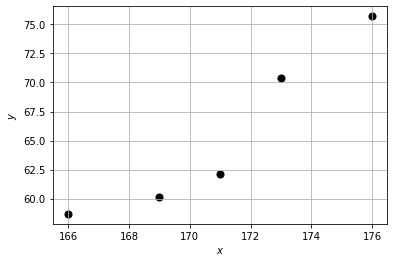

In [6]:
for point in sampleData1:
    plt.scatter(point[0], point[1], c='k', s=50)
    
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [7]:
# 0 ~ 9
value = np.arange(10)
# 5 ~ 14
value2 = np.arange(5, 15)
# 1 ~ 99까진데 중간의 차이가 2씩
value3 = np.arange(1, 100, 2)

print(value)
print(value2)
print(value3)

[0 1 2 3 4 5 6 7 8 9]
[ 5  6  7  8  9 10 11 12 13 14]
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95
 97 99]


In [8]:
dx = 0.0000001
start = 0.0
end = 3.0

loopLen = (end - start) / dx
print(loopLen)

x = 0
y = 0
area = 0

for i in range(int(loopLen)):
    y = x ** 2
    x += dx
    area += dx * y
    
print("0 ~ 3까지 적분 결과는 = " + str(area))

30000000.0
0 ~ 3까지 적분 결과는 = 8.999999547431766


In [ ]:
# 3일차에서 풀었던 정적분 문제를
# 멀티 프로세스 및 스레드 기반으로 가속시켜보자!
# 정밀도는 올라가고 동작 속도도 빨라지게 만든다.